In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split

# Problem 1 (PCA)

In [2]:
im_files=os.listdir("Faces")

images=[]
for i in range(1,len(im_files)):
    im=np.array(Image.open("Faces/" + im_files[i]).resize((70,70)))
    images.append(im)
images=np.array(images)
images=images.reshape((images.shape[0], -1))

indices=[]
for i in range(15):
    index=i*11+np.random.randint(11)
    indices.append(index)

centered_images=images-images.mean(axis=0)

test_images=images[indices]

train_indices = np.ones(165, dtype=bool)
train_indices[indices] = False
train_images=images[train_indices]

mu=train_images.mean(axis=0)
centered_images=train_images-mu
C=np.cov(centered_images.T) # C is covariance matrix

evals, evecs = np.linalg.eig(C)
evals=evals.real
evecs=evecs.real
evecs=evecs/np.linalg.norm(evecs,axis=0)
evals=evals[np.flip(np.argsort(evals))]
evecs=evecs[:,np.flip(np.argsort(evals))]

Text(0.5, 0.98, 'Scree graph for first 100 Eigenvalues')

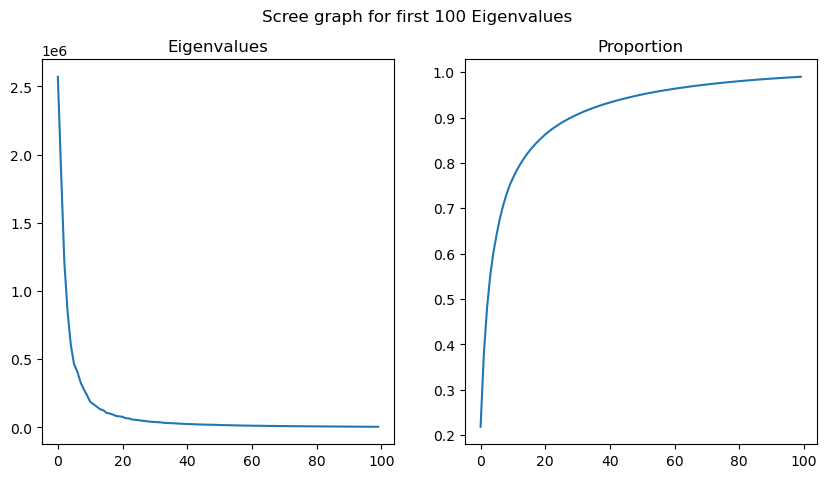

In [3]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].plot(range(0,100),evals[:100])
axes[0].set_title("Eigenvalues")
proportion=evals.cumsum()/sum(evals)
axes[1].plot(range(0,100),proportion[:100])
axes[1].set_title("Proportion")
fig.suptitle("Scree graph for first 100 Eigenvalues")

We can see that the first 30 eigenvalues explains 90% of the variance, nearly 85% of the variance is explained by the first 20 eigenvalues.

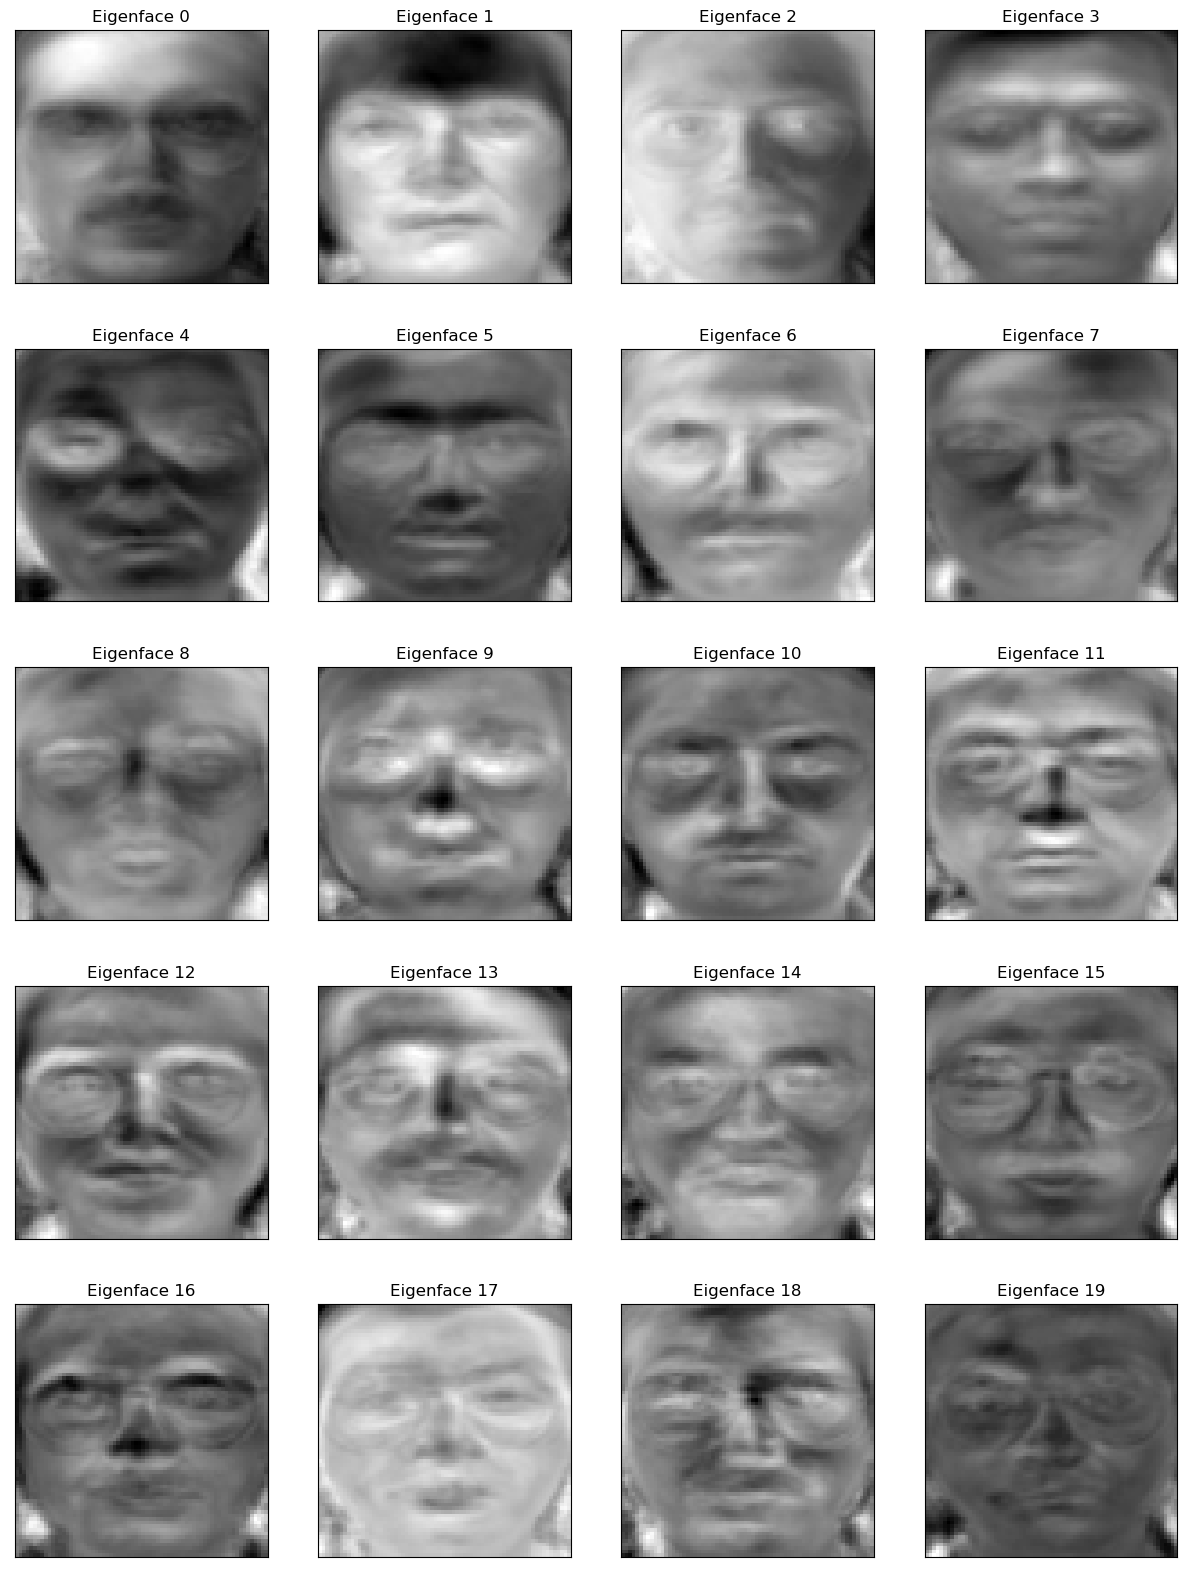

In [126]:
fig,axes=plt.subplots(5,4,figsize=(15,20))
for i in range(5):
    for j in range(4):
        axes[i,j].imshow(evecs[:,4*i+j].reshape((70,70)),cmap="gray")
        axes[i,j].set_title(f"Eigenface {4*i+j}")
        axes[i,j].set_xticks([]) 
        axes[i,j].set_yticks([])

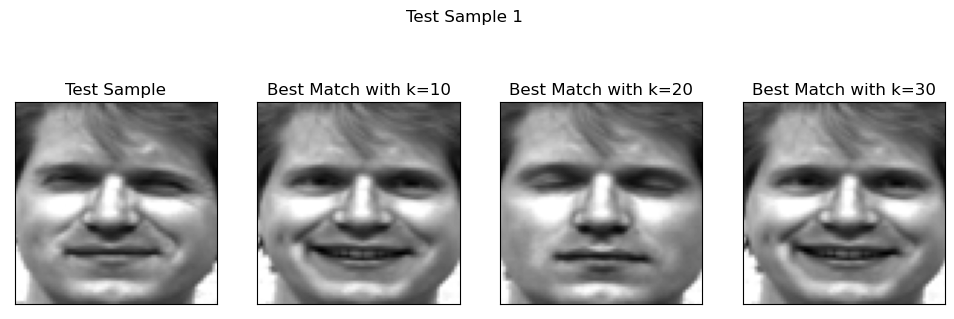

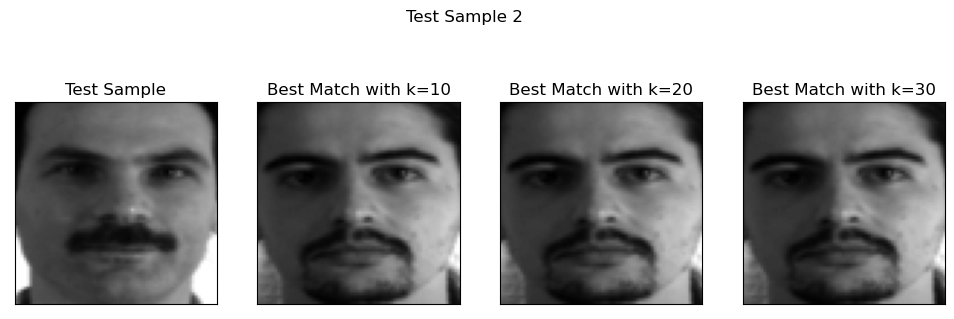

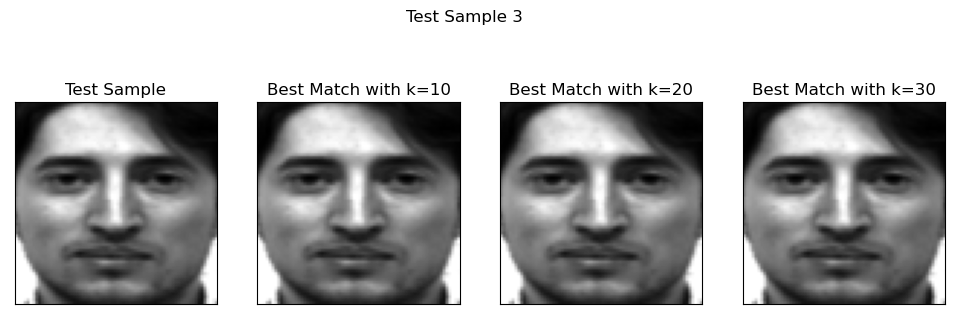

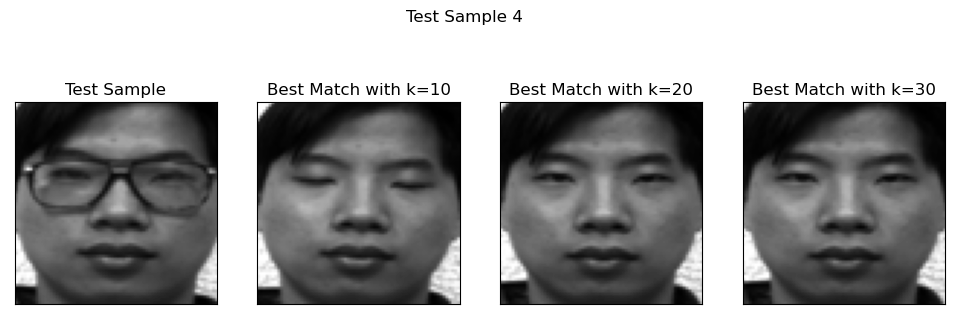

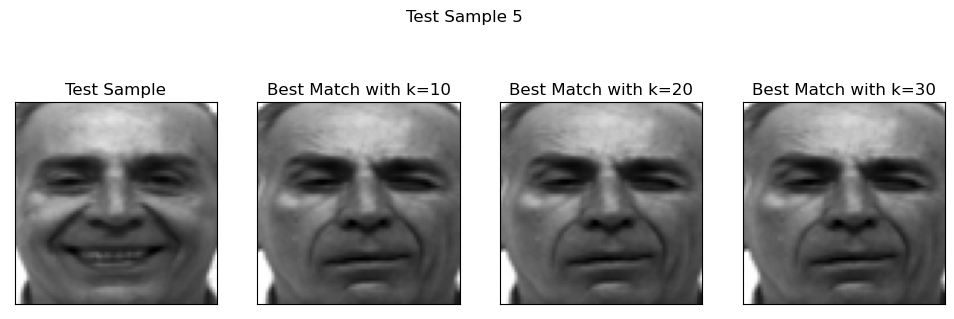

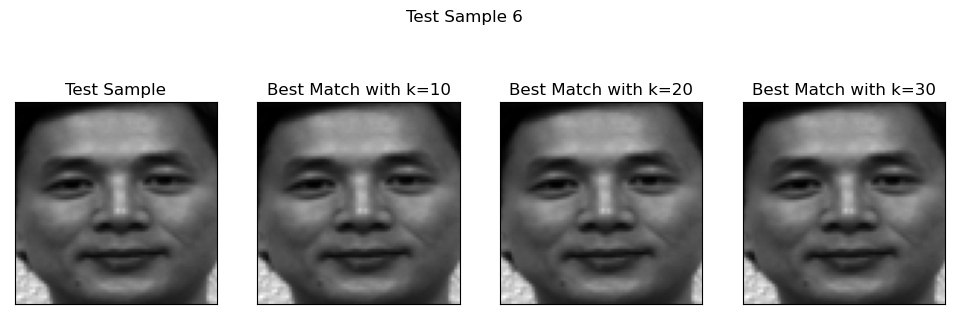

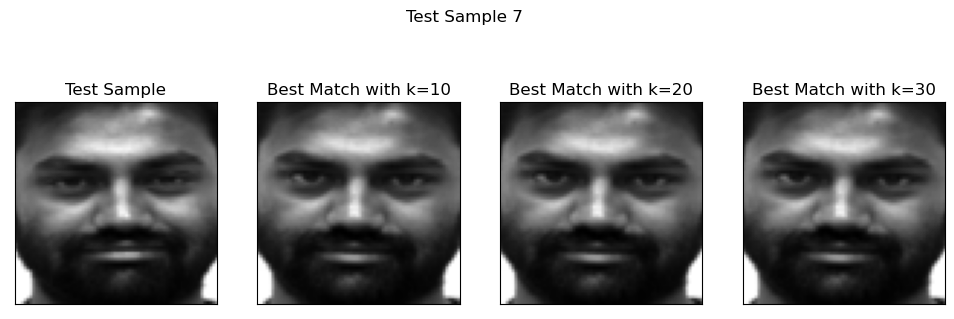

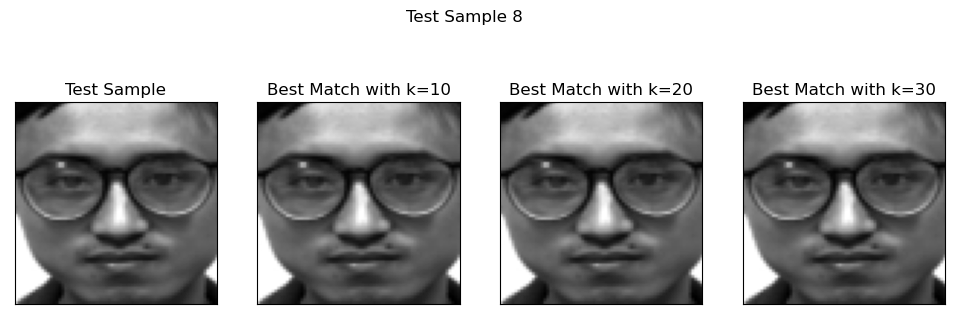

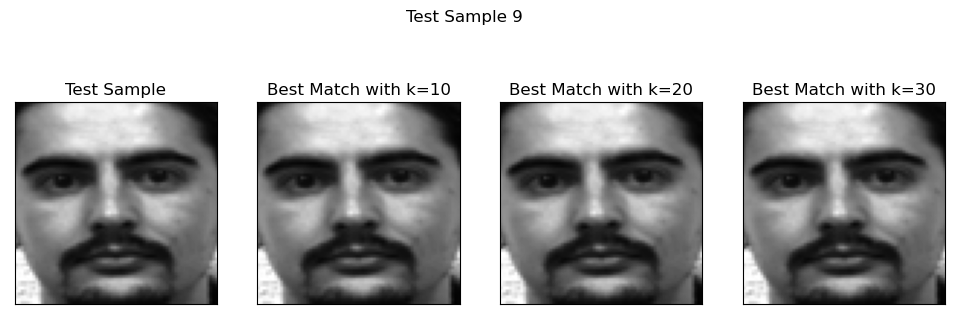

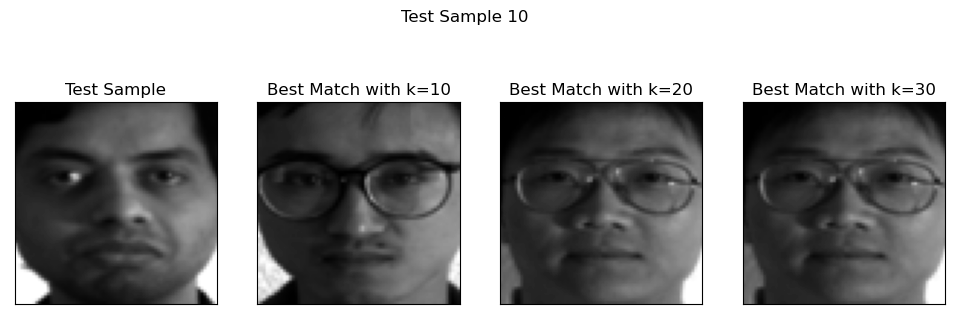

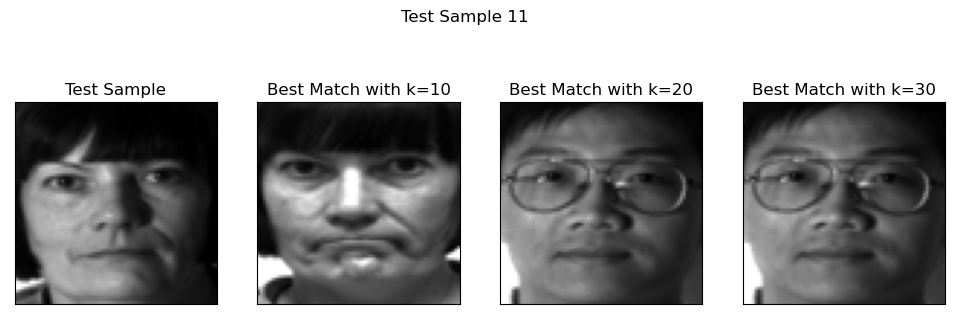

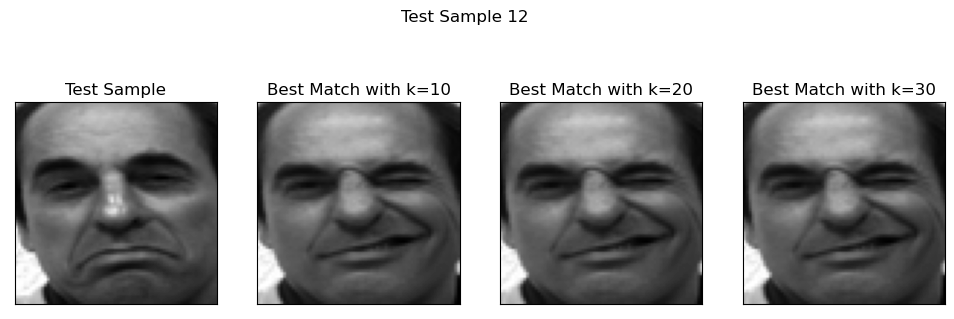

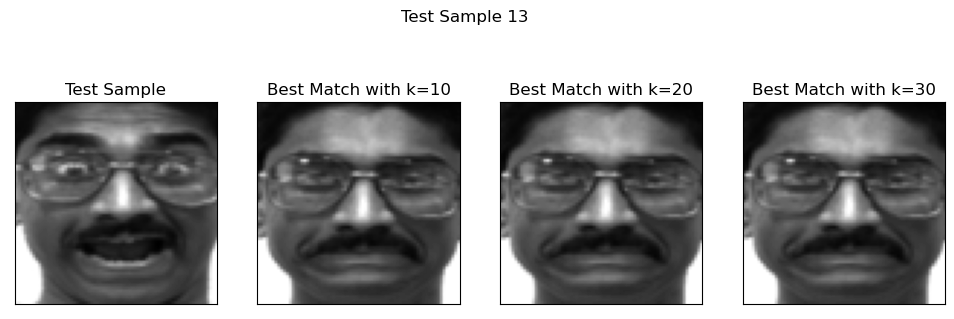

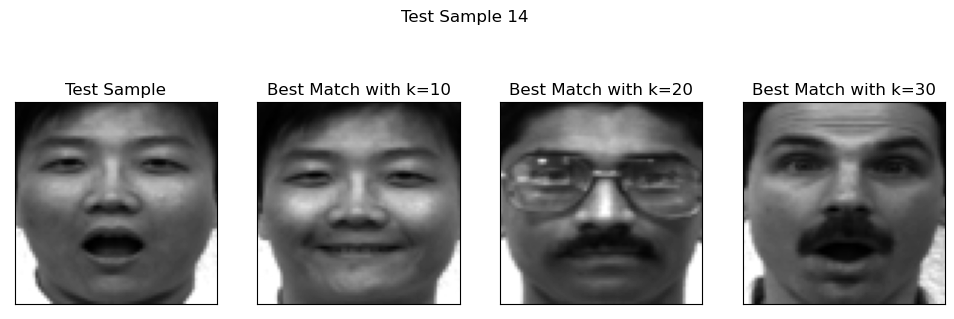

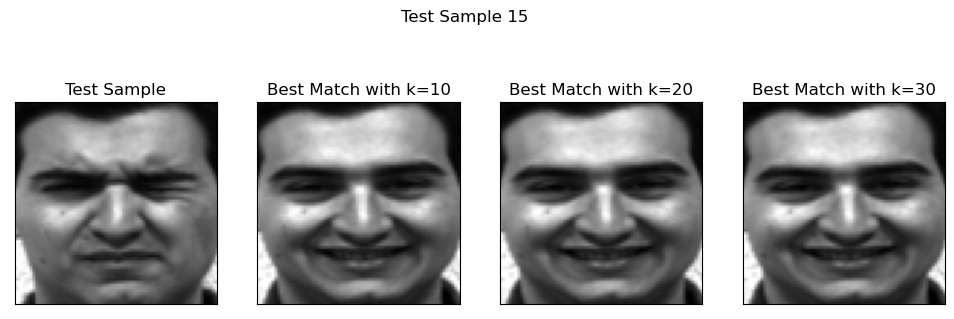

In [125]:
first_20=evecs[:,:20]
proj_ims_20=np.dot(centered_images,first_20)
first_30=evecs[:,:30]
proj_ims_30=np.dot(centered_images,first_30)
first_10=evecs[:,:10]
proj_ims_10=np.dot(centered_images,first_10)

for i in range(len(test_images)):
    test_sample=test_images[i]
    fig,axes=plt.subplots(1,4,figsize=(12,4))
    axes[0].imshow(test_sample.reshape((70,70)),cmap="gray")
    axes[0].set_title("Test Sample")
    axes[0].set_xticks([]) 
    axes[0].set_yticks([])
    
    centered_sample=test_sample-train_images.mean(axis=0)
    projected_sample=np.dot(centered_sample,first_10)
    min_dis=np.argmin(np.linalg.norm(proj_ims_10-projected_sample,axis=1))
    axes[1].imshow(train_images[min_dis,:].reshape((70,70)),cmap="gray")
    axes[1].set_title("Best Match with k=10")
    axes[1].set_xticks([]) 
    axes[1].set_yticks([])
    
    projected_sample=np.dot(centered_sample,first_20)
    min_dis=np.argmin(np.linalg.norm(proj_ims_20-projected_sample,axis=1))
    axes[2].imshow(train_images[min_dis,:].reshape((70,70)),cmap="gray")
    axes[2].set_title("Best Match with k=20")
    axes[2].set_xticks([]) 
    axes[2].set_yticks([])
    
    projected_sample=np.dot(centered_sample,first_30)
    min_dis=np.argmin(np.linalg.norm(proj_ims_30-projected_sample,axis=1))
    axes[3].imshow(train_images[min_dis,:].reshape((70,70)),cmap="gray")
    axes[3].set_title("Best Match with k=30")
    axes[3].set_xticks([]) 
    axes[3].set_yticks([])
    
    fig.suptitle(f"Test Sample {i+1}")    
    plt.show()

# Problem 2 (LDA)

In [27]:
def generate_hypersphere(c,r,n,d):
    '''
    Generate n number of points inside a hypersphere in R^d
    with radius r and center c
    '''
    points=np.random.randn(d,n)
    points=c+r*points/np.linalg.norm(points,axis=0)
    return points

In [121]:
def normalized_hist(S,m,color,alpha=1): 
    '''
    Plot the normalized histogram of the points S with m bins,
    with bins color as 'color' and tranparency alpha.
    '''
    min_S=S.min()
    max_S=S.max()
    b_s=(max_S-min_S)/m
    H=np.zeros(m)
    for i in range(n):
      b_i=int(np.floor((S[i]-min_S)/(b_s)))
      if b_i==m:
        b_i=b_i-1
      H[b_i]=H[b_i]+1/n

    bin_arr=[min_S+b_s*i for i in range(m+1)]
    bin_arr=np.array(bin_arr)
    plt.bar(bin_arr[:-1],H,width=b_s,color=color,alpha=alpha)

In [11]:
n=1000
d=20

## Case 1 : || C1-C2 || > 2r

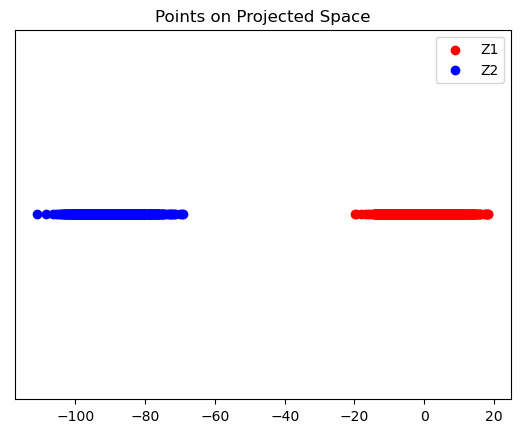

In [131]:
# Center and radius
C1= np.zeros((d,1))
C2= np.zeros((d,1))
r = 5
C2[0,0]=3*r
# Generate points within Spheres
S1=generate_hypersphere(C1,r,n,d)
S2=generate_hypersphere(C2,r,n,d)

# Calculate mean
m1=S1.mean(axis=1)
m2=S2.mean(axis=1)

# Calculate Covariance
Cov1=np.cov(S1)
Cov2=np.cov(S2)

# LDA direction
S_W = Cov1+Cov2
w=np.linalg.solve(S_W,m1-m2)

# Projected points
Z1=np.dot(w,S1)
Z2=np.dot(w,S2)

# Plot the projected points
plt.scatter(Z1,np.zeros(len(Z1)),color='red')
plt.scatter(Z2,np.zeros(len(Z2)),color='blue')
plt.title("Points on Projected Space")
plt.legend(["Z1","Z2"])
plt.yticks([])
plt.show()

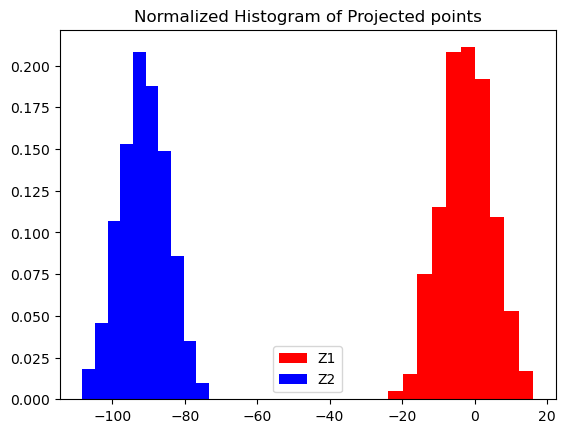

In [114]:
normalized_hist(Z1,10,'red')
normalized_hist(Z2,10,'blue')
plt.title("Normalized Histogram of Projected points")
plt.legend(["Z1","Z2"])

## Case 2 : || C1-C2 || = 2r - e

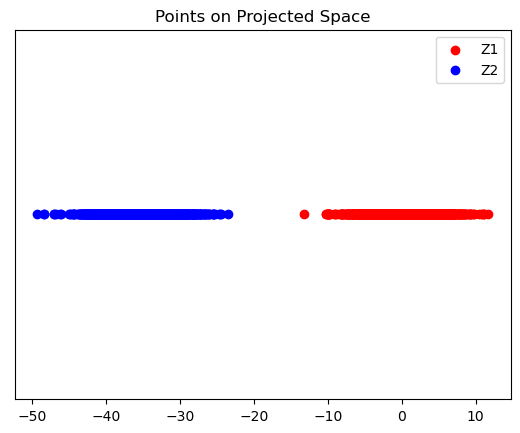

In [128]:
e=r/10
C1= np.zeros((d,1))
C2= np.zeros((d,1))
r = 5
C2[0,0]=2*r-e
S1=generate_hypersphere(C1,r,n,d)
S2=generate_hypersphere(C2,r,n,d)

m1=S1.mean(axis=1)
m2=S2.mean(axis=1)

Cov1=np.cov(S1)
Cov2=np.cov(S2)

S_W = Cov1+Cov2
w=np.linalg.solve(S_W,m1-m2)

Z1=np.dot(w,S1)
Z2=np.dot(w,S2)

plt.scatter(Z1,np.zeros(len(Z1)),color='red')
plt.scatter(Z2,np.zeros(len(Z2)),color='blue')
plt.title("Points on Projected Space")
plt.legend(["Z1","Z2"])
plt.yticks([])
plt.show()

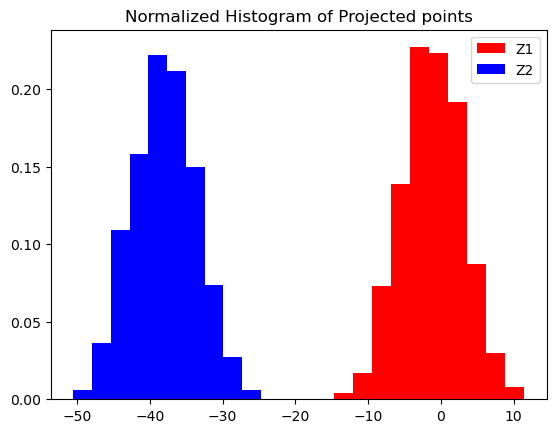

In [116]:
normalized_hist(Z1,10,'red')
normalized_hist(Z2,10,'blue')
plt.title("Normalized Histogram of Projected points")
plt.legend(["Z1","Z2"])

## Case 3 : || C1-C2 || < 2r

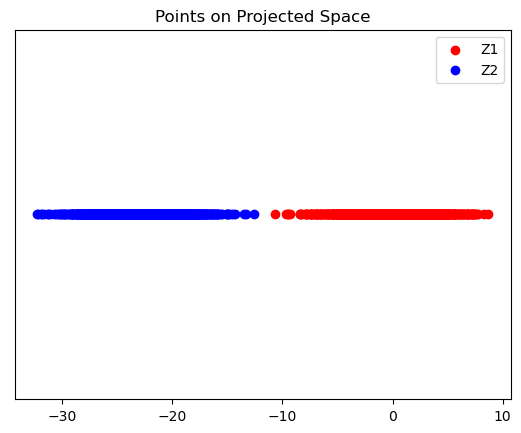

In [130]:
C1= np.zeros((d,1))
C2= np.zeros((d,1))
r = 5
C2[0,0]=1.5*r
S1=generate_hypersphere(C1,r,n,d)
S2=generate_hypersphere(C2,r,n,d)

m1=S1.mean(axis=1)
m2=S2.mean(axis=1)

Cov1=np.cov(S1)
Cov2=np.cov(S2)

S_W = Cov1+Cov2
w=np.linalg.solve(S_W,m1-m2)

Z1=np.dot(w,S1)
Z2=np.dot(w,S2)

plt.scatter(Z1,np.zeros(len(Z1)),color='red')
plt.scatter(Z2,np.zeros(len(Z2)),color='blue')
plt.title("Points on Projected Space")
plt.legend(["Z1","Z2"])
plt.yticks([])
plt.show()

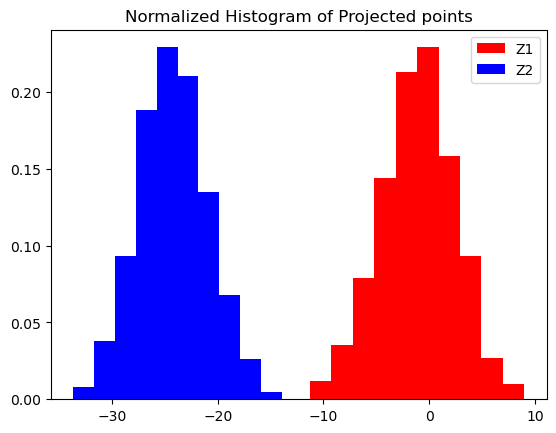

In [118]:
normalized_hist(Z1,10,'red')
normalized_hist(Z2,10,'blue')
plt.title("Normalized Histogram of Projected points")
plt.legend(["Z1","Z2"])

## Case 4 : || C1-C2 || < r

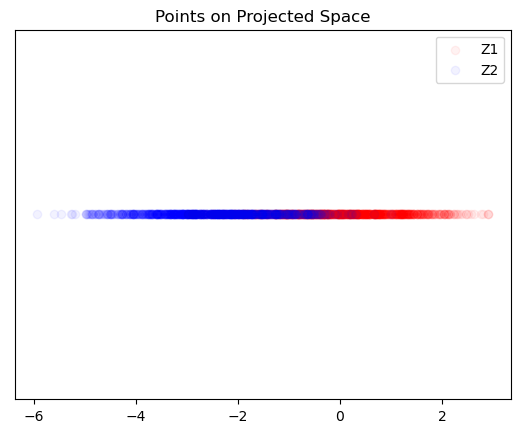

In [132]:
C1= np.zeros((d,1))
C2= np.zeros((d,1))
r = 5
C2[0,0]=r/2
S1=generate_hypersphere(C1,r,n,d)
S2=generate_hypersphere(C2,r,n,d)

m1=S1.mean(axis=1)
m2=S2.mean(axis=1)

Cov1=np.cov(S1)
Cov2=np.cov(S2)

S_W = Cov1+Cov2
w=np.linalg.solve(S_W,m1-m2)

Z1=np.dot(w,S1)
Z2=np.dot(w,S2)

plt.scatter(Z1,np.zeros(len(Z1)),color='red',alpha=0.05)
plt.scatter(Z2,np.zeros(len(Z2)),color='blue',alpha=0.05)
plt.title("Points on Projected Space")
plt.legend(["Z1","Z2"])
plt.yticks([])
plt.show()

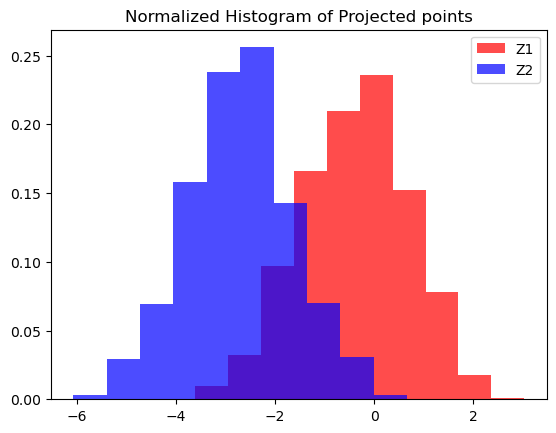

In [120]:
normalized_hist(Z1,10,'red',alpha=0.7)
normalized_hist(Z2,10,'blue',alpha=0.7)
plt.title("Normalized Histogram of Projected points")
plt.legend(["Z1","Z2"])

([], [])

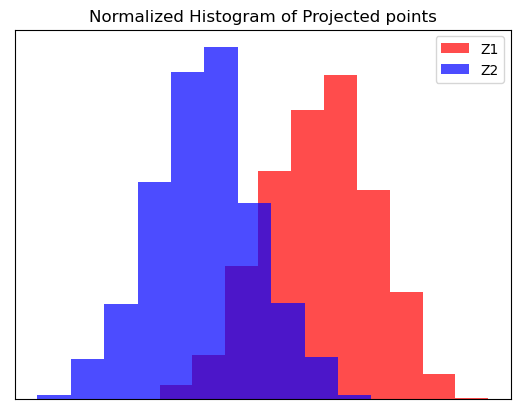

In [122]:
normalized_hist(Z1,10,'red',alpha=0.7)
normalized_hist(Z2,10,'blue',alpha=0.7)

plt.title("Normalized Histogram of Projected points")
plt.legend(["Z1","Z2"])

